# EXPLORATORY DATA ANALYSIS

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the csv file and assigning name d1 for it
d1=pd.read_csv("fake_news.csv")
d1

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [3]:
#Removing unwanted columns (2 index columns and id column) that donot provide information for our analysis
d1.drop('Unnamed: 0',axis=1,inplace=True)
d1.drop('id',axis=1,inplace=True)
d1.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
#Checking the number of rows and columns in our dataset
d1.shape

(20800, 4)

There are 20800 rows and 4 columns in our dataset

In [5]:
#checking the information about each column
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   headline    20242 non-null  object
 1   written_by  18843 non-null  object
 2   news        20761 non-null  object
 3   label       20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


#there are total 20800 rows in each column
#there is only 20242 entries in headline ,18843 entries in written_by ,20761 entries in news and 20800 entries in label column
#this means there are null values in our dataset
#headline,written_by and news columns are object datatype and label column is integer datatype

In [6]:
#checking the number of unique values in each column
d1.nunique()

headline      19803
written_by     4201
news          20386
label             2
dtype: int64

This shows the number of  categories in each column.Label is our target column there are only 2 values in it.

In [7]:
d1.columns

Index(['headline', 'written_by', 'news', 'label'], dtype='object')

In [8]:
#checking the number of null values in each column
d1.isnull().sum()

headline       558
written_by    1957
news            39
label            0
dtype: int64

#There are 558 null values in headline
#There are 1957 null values in written_by
#and 39 null values in news column

In [9]:
#Filling the na values
d1['headline']=d1['headline'].replace(np.nan, d1['news'])
d1['news']=d1['news'].replace(np.nan, d1['headline'])

#since the only column we focus will be the news and headline,we can fill the na values of headline columns with corresponding news column and viceversa.

In [10]:
d1.drop('written_by',axis=1,inplace=True)

#dropping the written_by column as it has many na values and also for the analysis we only need the news and label column

In [11]:
d1.head()

,headline,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1


In [12]:
#again checking for null values if any
d1.isnull().sum()

headline    0
news        0
label       0
dtype: int64

Now all the na values are cleared

In [13]:
print('fake and not_fake  counts','\n',d1.label.value_counts())

fake and not_fake  counts 
 1    10413
0    10387
Name: label, dtype: int64


#1- fake ->There are 10413 fake news
#0 -not_fake -> There are 10387 real news

In [14]:
#adding new column for length of news
d1['length']=d1.news.str.len()
d1.head(5)

,headline,news,label,length
0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1,9164


In [15]:
#describing labels
d1.groupby('label').describe()

length                                                         \
         count         mean          std  min     25%     50%     75%   
label                                                                   
0      10387.0  5214.130452  4313.791236  3.0  2397.0  4591.0  7015.0   
1      10413.0  3876.263613  5753.395108  1.0  1043.0  2351.0  4801.0   

                 
            max  
label            
0       85948.0  
1      142961.0

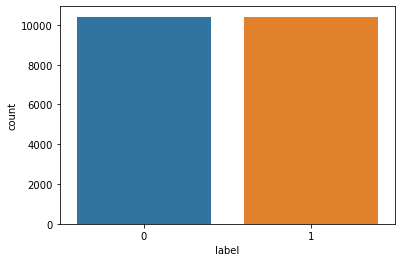

In [16]:
sns.countplot(d1["label"])

#count plot showing counts of fake and real news.
#there are 10413 fake news and 10387 real news

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F6F576D30>,
      dtype=object)

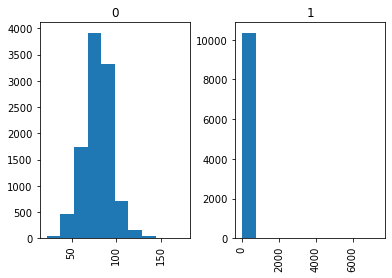

In [17]:
#Number of characters present in each headline
d1['headline'].str.len().hist(by=d1['label'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F6F664E50>,
      dtype=object)

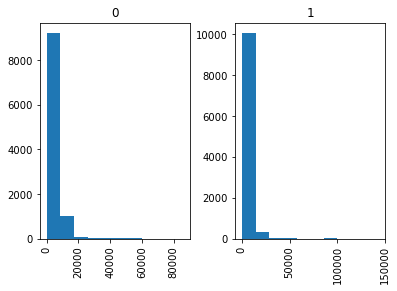

In [18]:
#Number of characters present in each news
d1['news'].str.len().hist(by=d1['label'])

CLEANING THE DATA

In [19]:
#converting message to lower case
d1['news']=d1['news'].str.lower()
d1.head(5)

,headline,news,label,length
0,Ethics Questions Dogged Agriculture Nominee as...,"washington — in sonny perdue’s telling, geo...",0,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,houston — venezuela had a plan. it was a ta...,0,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,"sunday on abc’s “this week,” while discussing ...",0,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...","augusta, me. — the beleaguered republican g...",0,6516
4,A Digital 9/11 If Trump Wins,finian cunningham has written extensively on...,1,9164


In [20]:
#replace email address with 'email'
d1['news']=d1['news'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#replace URLs with 'web address'
d1['news']=d1['news'].str.replace(r'^httpp\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replace moneysymbols with 'moneysymb'
d1['news']=d1['news'].str.replace(r'$','dollers')

#replace phone numbers with 'phonenumber
d1['news']=d1['news'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with number
d1['news']=d1['news'].str.replace(r'\d+(\.\d+)?','number')

In [21]:
#remove punctuation
d1['news']=d1['news'].str.replace(r'[^\w\d\s]',' ')

#remove whitespace in between terms with single space
d1['news']=d1['news'].str.replace(r'\s+',' ')

#remove leadin and training white space
d1['news']=d1['news'].str.replace(r'^\s+|\s+?$',' ')


In [22]:
d1.head()

,headline,news,label,length
0,Ethics Questions Dogged Agriculture Nominee as...,washington in sonny perdue s telling georgians...,0,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,houston venezuela had a plan it was a tactical...,0,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,sunday on abc s this week while discussing the...,0,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",augusta me the beleaguered republican governor...,0,6516
4,A Digital 9/11 If Trump Wins,finian cunningham has written extensively on ...,1,9164


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
### Dataset Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(d1)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', d1['news'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [25]:
corpus

['washington sonni perdu tell georgian grow weari corrupt scandal state took governor number time gave version drain swamp pledg first goal governor restor public trust state govern chang cultur state govern mr perdu told leadership confer kennesaw state univers april number form govern depend mutual bond trust peopl govern peopl becom cynic govern mr perdu republican await confirm serv presid trump agricultur secretari becam target frequent critic fail honor ethic pledg eight year governor critic center fact mr trump continu help run famili busi ventur four compani serv governor mr perdu one last cabinet member await senat confirm date set confirm hear holdup releas paperwork accompani nomin feder offic govern ethic blame delay offic must examin mr perdu propos avoid conflict interest run u depart known may includ sell farm asset tenur governor end number number complaint file mr perdu state ethic commiss two occas rule governor violat state ethic law commiss took unusu step fine mr p

In [26]:
#New column for length after removal of stopwords
d1['clean_length']=d1.news.str.len()
d1.head(10)

,headline,news,label,length,clean_length
0,Ethics Questions Dogged Agriculture Nominee as...,washington in sonny perdue s telling georgians...,0,7936,7757
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,houston venezuela had a plan it was a tactical...,0,6112,5993
2,Cotton to House: ’Do Not Walk the Plank and Vo...,sunday on abc s this week while discussing the...,0,425,401
3,"Paul LePage, Besieged Maine Governor, Sends Co...",augusta me the beleaguered republican governor...,0,6516,6289
4,A Digital 9/11 If Trump Wins,finian cunningham has written extensively on ...,1,9164,9006
5,Whatever the Outcome on November 8th the US Wi...,taming the corporate media beast whatever the ...,1,15285,15007
6,Rapid Evolution Saved This Fish From Pollution...,the state of new jersey says you can t eat the...,0,4159,4079
7,Alabama Prison Officials Retaliate Against Pri...,advocates say prison officials at the kilby co...,1,6311,6146
8,People have made up their minds on president.\...,people have made up their minds on president i...,1,782,789
9,Can We Live in a Constant State of Love?,leave a reply toni emerson when we fall in lov...,1,6386,6225


#Here we can see the length of original news and length after removing stopwords

In [27]:
#total length removal
print('original length',d1.length.sum())
print('clean length',d1.clean_length.sum())

original length 94522706
clean length 92345274


UNDERSTANDING THE DATA AND FINDING THE IMPORTANT WORDS

In [28]:
pip install wordcloud

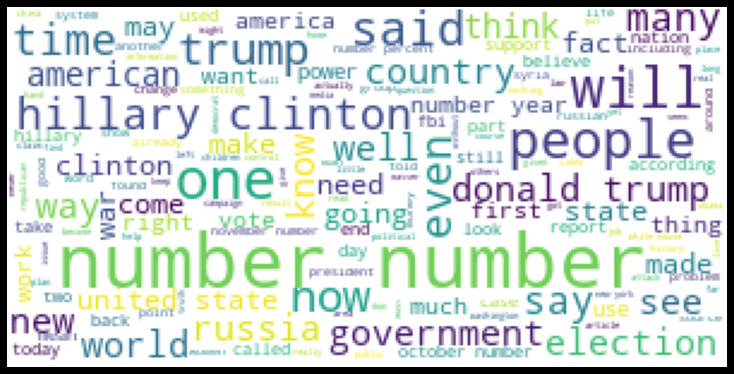

In [29]:
#loud words in fake_news
from wordcloud import WordCloud

fake_news=d1['news'][d1['label']==1]
spam_cloud=WordCloud(width=300,height=150,min_word_length=3,background_color='white',max_words=200).generate(''.join(fake_news))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

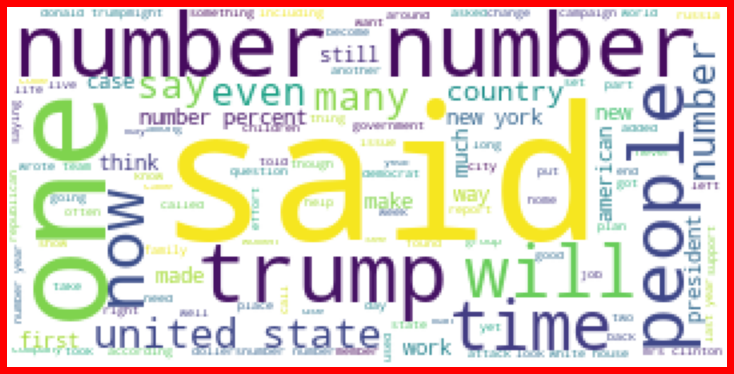

In [30]:
#loud words in real news

real_news=d1['news'][d1['label']==0]
spam_cloud=WordCloud(width=300,height=150,min_word_length=3,background_color='white',max_words=200).generate(''.join(real_news))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

CONVERTING TEXT INTO VECTORS AND SPLITTING FEATURE AND LABEL

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(d1['news'])

x=features
y=d1['label']

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 70 is 0.8975087412587412


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=70)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16224, 176880)
(4576, 176880)
(16224,)
(4576,)


In [35]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score : 0.9477709790209791
[[2197  134]
 [ 105 2140]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2331
           1       0.94      0.95      0.95      2245

    accuracy                           0.95      4576
   macro avg       0.95      0.95      0.95      4576
weighted avg       0.95      0.95      0.95      4576



In [36]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,random_state=68)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print("Accuracy score :",accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

score: 0.9999383629191322


Accuracy score : 0.8607954545454546
[[2109  222]
 [ 415 1830]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2331
           1       0.89      0.82      0.85      2245

    accuracy                           0.86      4576
   macro avg       0.86      0.86      0.86      4576
weighted avg       0.86      0.86      0.86      4576



In [37]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

Accuracy score : 0.8446241258741258
[[2317   14]
 [ 697 1548]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2331
           1       0.99      0.69      0.81      2245

    accuracy                           0.84      4576
   macro avg       0.88      0.84      0.84      4576
weighted avg       0.88      0.84      0.84      4576



In [38]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score : 0.8946678321678322
[[2074  257]
 [ 225 2020]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2331
           1       0.89      0.90      0.89      2245

    accuracy                           0.89      4576
   macro avg       0.89      0.89      0.89      4576
weighted avg       0.89      0.89      0.89      4576



In [39]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [40]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.87005681, 0.79891044, 0.04105006, ..., 0.93659425, 0.13766757,
       0.8510914 ])

In [41]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.29000429e-04,
       4.29000429e-04, 4.29000429e-04, 4.29000429e-04, 8.58000858e-04,
       8.58000858e-04, 8.58000858e-04, 8.58000858e-04, 8.58000858e-04,
       8.58000858e-04, 1.28700129e-03, 1.28700129e-03, 1.28700129e-03,
       1.28700129e-03, 1.28700129e-03, 1.28700129e-03, 1.71600172e-03,
       1.71600172e-03, 2.14500215e-03, 2.14500215e-03, 2.57400257e-03,
       2.57400257e-03, 3.00300300e-03, 3.00300300e-03, 3.43200343e-03,
       3.43200343e-03, 3.86100386e-03, 3.86100386e-03, 4.29000429e-03,
      

In [42]:
tpr

array([0.00000000e+00, 4.45434298e-04, 4.45434298e-02, 4.54342984e-02,
       7.03786192e-02, 7.34966592e-02, 7.39420935e-02, 7.52783964e-02,
       7.66146993e-02, 7.75055679e-02, 1.29175947e-01, 1.30066815e-01,
       1.42538976e-01, 1.43429844e-01, 1.46102450e-01, 1.46993318e-01,
       1.71046771e-01, 1.72383073e-01, 1.77282851e-01, 1.78173719e-01,
       1.91982183e-01, 1.93318486e-01, 2.11581292e-01, 2.12917595e-01,
       2.39198218e-01, 2.40089087e-01, 2.41870824e-01, 2.41870824e-01,
       3.62138085e-01, 3.63474388e-01, 3.74164811e-01, 3.74164811e-01,
       3.79955457e-01, 3.82182628e-01, 4.33853007e-01, 4.34743875e-01,
       4.85077951e-01, 4.85077951e-01, 5.13140312e-01, 5.14031180e-01,
       5.32293987e-01, 5.40311804e-01, 5.95545657e-01, 5.95545657e-01,
       5.99109131e-01, 5.99109131e-01, 6.08908686e-01, 6.08908686e-01,
       6.39643653e-01, 6.39643653e-01, 6.61469933e-01, 6.61469933e-01,
       7.25167038e-01, 7.25167038e-01, 7.34075724e-01, 7.34075724e-01,
      

In [43]:
thresholds

array([1.99927740e+00, 9.99277405e-01, 9.87697223e-01, 9.87683754e-01,
       9.82218782e-01, 9.82118409e-01, 9.82011072e-01, 9.81956042e-01,
       9.81856492e-01, 9.81854727e-01, 9.71430468e-01, 9.71400774e-01,
       9.69436298e-01, 9.69406355e-01, 9.68803039e-01, 9.68794419e-01,
       9.64635683e-01, 9.64523398e-01, 9.63037932e-01, 9.62950422e-01,
       9.60663798e-01, 9.60569680e-01, 9.57650195e-01, 9.57613721e-01,
       9.52440872e-01, 9.52307718e-01, 9.51962480e-01, 9.51953500e-01,
       9.24450961e-01, 9.24294343e-01, 9.20460931e-01, 9.20427627e-01,
       9.19292132e-01, 9.18372875e-01, 9.05972429e-01, 9.05763085e-01,
       8.91180219e-01, 8.91070935e-01, 8.82350086e-01, 8.82255024e-01,
       8.75441094e-01, 8.75178153e-01, 8.54029375e-01, 8.53690787e-01,
       8.52718350e-01, 8.52354161e-01, 8.50601946e-01, 8.50323001e-01,
       8.39944484e-01, 8.39863572e-01, 8.30255728e-01, 8.30192936e-01,
       7.99822383e-01, 7.99635788e-01, 7.92971815e-01, 7.92917311e-01,
      

<function matplotlib.pyplot.show(*args, **kw)>

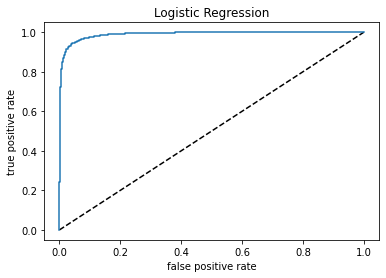

In [44]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show

In [45]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.9478716705888197


<function matplotlib.pyplot.show(*args, **kw)>

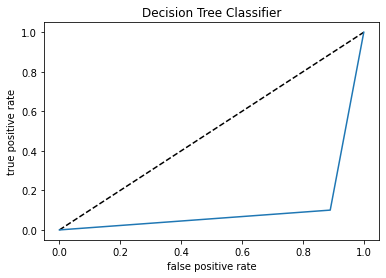

In [46]:
#Decision tree curve
y_pred_prob=dtc.predict_proba(x_test)[:,0]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show

In [47]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.9478716705888197


In [50]:
from sklearn.model_selection import cross_val_score

lr=LogisticRegression()
score=cross_val_score(lr,x,y,cv=5)
print("score:",score)
print("Mean score:",score.mean())
print("Standard deviation:",score.std())

score: [0.94711538 0.94350962 0.94879808 0.94447115 0.94423077]
Mean score: 0.9456249999999999
Standard deviation: 0.0020019868090054745


In [51]:
#saving randomforest classifier

import joblib
joblib.dump(rf,'lr_fake_news.pkl')

['lr_fake_news.pkl']